<a href="https://colab.research.google.com/github/Mamadou2025/Pseudo-Dual-Rickart-Code-Tester/blob/main/Fontions_Images_Regularity_Max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from itertools import product

def is_endomorphism(f, M):
    """Check if f preserves the max operation of the join-semilattice."""
    return all(f[max(x, y)] == max(f[x], f[y]) for x, y in product(M, repeat=2))

def direct_image(f, M):
    """Compute the direct image of f."""
    return {f[x] for x in M}

def extended_image(f, M):
    """Compute the extended image via max closure."""
    im_f = direct_image(f, M)
    return {y for y in M if any(max(y, f[x]) in im_f for x in M)}

def generate_endomorphisms(n):
    """Generate all endomorphism functions for M = {0, 1, ..., n}."""
    M = list(range(n + 1))
    results = []

    for f_vals in product(M, repeat=len(M)):
        f = dict(enumerate(f_vals))
        if f[0] == 0 and is_endomorphism(f, M):
            im_f = direct_image(f, M)
            ext_im = extended_image(f, M)
            results.append({
                'function': f_vals,
                'image': im_f,
                'extended_image': ext_im,
                'i-regular': im_f == ext_im
            })

    return results

def display_results(n):
    """Display formatted analysis results."""
    results = generate_endomorphisms(n)
    M = list(range(n + 1))

    print(f"\nAnalysis for M = {M} (n = {n})")
    print("{:<15} | {:<12} | {:<16} | {}".format(
        "Function", "Image", "Extended Image", "i-regular"))
    print("-" * 52)

    for res in results:
        f_str = str(res['function']).ljust(15)
        im_str = str(res['image']).ljust(12)
        ext_im_str = str(res['extended_image']).ljust(16)
        ireg_str = "Yes" if res['i-regular'] else "No"
        print(f"{f_str} | {im_str} | {ext_im_str} | {ireg_str}")

# Example usage
display_results(2)  # Analyzing with n=2


Analysis for M = [0, 1, 2] (n = 2)
Function        | Image        | Extended Image   | i-regular
----------------------------------------------------
(0, 0, 0)       | {0}          | {0}              | Yes
(0, 0, 1)       | {0, 1}       | {0, 1}           | Yes
(0, 0, 2)       | {0, 2}       | {0, 1, 2}        | No
(0, 1, 1)       | {0, 1}       | {0, 1}           | Yes
(0, 1, 2)       | {0, 1, 2}    | {0, 1, 2}        | Yes
(0, 2, 2)       | {0, 2}       | {0, 1, 2}        | No


HOW TO USE THIS CODE

Here's how you could proceed with this code. You can change the value of the integer n and then click the Run button. This button is located at the beginning of the code, in the top left corner, in the form of a white triangle in a black circle. For n=2, here's the captured output:

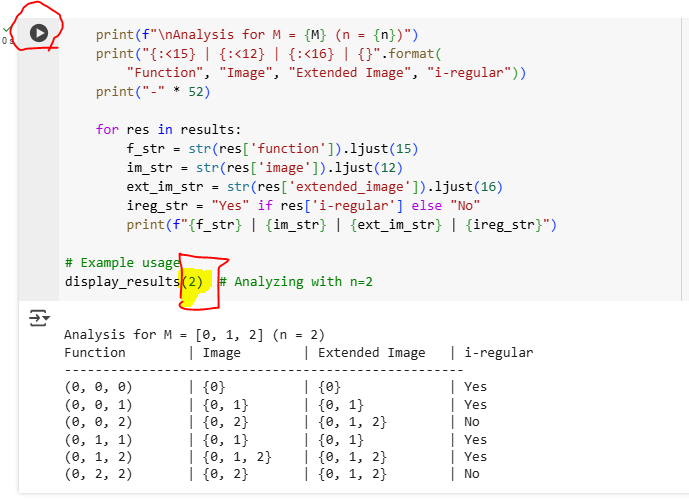


This code analyzes functions on the set M = {0, 1, ..., n} (where n=2 in the example) that preserve the MAX operation (called endomorphisms).

**Key Components**: GCD Calculation: The max(x, y) function computes the greatest common divisor, with max(0,0) = 0.

**Endomorphism Check**: is_endomorphism(f, M) verifies if a function f preserves GCD, i.e., f(max(x, y)) = max(f(x), f(y)) for all x, y ∈ M.

**Idempotency Check**: is_idempotent(f, M) checks if f ∘ f = f (i.e., applying f twice is the same as applying it once).

**Image Calculation**:

*Poper_image f(M) gives the set of values f takes ({f(x) | x ∈ M}).

*Extended_image Im(M)* extends the image by including all elements y ∈ M such that gcd(y, f(x)) is in the direct image for some x.

*i-regularity*: A function is i-regular if its direct image equals its extended image (closed under MAX).

**Algorithm: Generate Valid Functions**:

For M = {0, 1, ..., n}, generate all possible functions f: M → M where:

f(0) = 0 (a common requirement for MAX-preserving functions).

f is an endomorphism (preserves MAX).

Analyze Functions: For each valid function, compute:

Whether it is idempotent (f ∘ f = f).

Its direct and extended images.

Whether it is i-regular (direct image = extended image).

Output Results: Display the results in a formatted table.

Example Output (for n=2): The code prints a table with columns:

Function: The function represented as a tuple (f(0), f(1), f(2)).

Idempotent: Whether f is idempotent.

Image: Direct image of f.

Extended Image: Extended image under MAX.

i-regular: Whether the function is i-regular.

Key Observations: The code exhaustively checks all possible functions (brute-force) for small n.

*For larger n*, this approach becomes computationally expensive (since there are (n+1)^(n+1) possible functions).
